In [43]:
import matplotlib.pyplot as plt
import numpy as np
import fastf1.plotting
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker
from fastf1 import utils

For this project, I will be using the fastf1 library, which is built on top of Pandas DataFrames and Series but includes convenient methods for working specifically with Formula 1 data. The goal of this project is to analyze the race session of the 2024 Australian Grand Prix, where Ferrari achieved a 1-2 finish with Carlos Sainz as the winner (proud moment for a Ferrari fan!).

The first step is to load the data for this session. After loading the data, we will proceed with data cleaning. This involves removing laps affected by pit stops and laps that are not accurate due to yellow flags, virtual safety cars, safety cars, or red flags.


In [56]:
# enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
fastf1.plotting.setup_mpl(misc_mpl_mods=False, color_scheme = 'fastf1')


# load a session and its telemetry data
session_23 = fastf1.get_session(2023, 'Austin Grand Prix', 'R')
session_23.load()
# In this way i Can exclude the box laps
laps_23 = session_23.laps.pick_wo_box()

# Pick just the accurate laps

laps_23 = laps_23[laps_23['IsAccurate']==True]



circuit_info_23 = session_23.get_circuit_info()
pos = laps_23.pick_fastest().get_pos_data()




core           INFO 	Loading data for United States Grand Prix - Race [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '55', '11', '63', '10', '18', '22', '23', '2', '27', '77', '24', '20', '3', '14', '81', '31', '44', '16']
core        WARNING 	Failed to preserve data type for co

In [57]:
# enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
fastf1.plotting.setup_mpl(misc_mpl_mods=False, color_scheme = 'fastf1')


# load a session and its telemetry data
session_24 = fastf1.get_session(2024, 'Austin Grand Prix', 'R')
session_24.load()
# In this way i Can exclude the box laps
laps_24 = session_24.laps.pick_wo_box()

# Pick just the accurate laps

laps_24 = laps_24[laps_24['IsAccurate']==True]

circuit_info_24 = session_24.get_circuit_info()
pos = laps_24.pick_fastest().get_pos_data()

core           INFO 	Loading data for United States Grand Prix - Race [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '55', '1', '4', '81', '63', '11', '27', '30', '43', '20', '10', '14', '22', '18', '23', '77', '31', '24', '44']


In [58]:
drivers_23 =laps_23['Driver'].unique()
compounds_23 = laps_23['Compound'].unique()


In [59]:
drivers_24 =laps_24['Driver'].unique()
compounds_24 = laps_24['Compound'].unique()

In [60]:
def timedelta_to_seconds(td: pd.Timedelta) -> float:
    """
    Convert a pandas Timedelta to a float representing the total seconds.
    
    Parameters:
    - td: pd.Timedelta
    
    Returns:
    - float: total seconds
    """
    return td.total_seconds()

In [61]:
# Transform the laps in total seconds
transformed_laps_23 = laps_23.copy()
transformed_laps_23.loc[:, "LapTime (s)"] = laps_23["LapTime"].dt.total_seconds()



# order the team from the fastest (lowest median lap time) to slower
team_order_23 = (
    transformed_laps_23[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)

# make a color palette associating team names to hex codes

specific_color_kick_sauber = '#90EE90'  # Light green
specific_color_alpha_tauri = '#1634cb'  # Specific blue color

def get_team_color(team):
    if team == 'Kick Sauber' or team == 'Alfa Romeo':
        return specific_color_kick_sauber
    elif team == 'AlphaTauri':
        return specific_color_alpha_tauri
    else:
        try:
            return fastf1.plotting.team_color(team)
        except KeyError:
            return '#000000'  # Default color (black) if team is not recognized

team_palette_23 = {team: get_team_color(team) for team in team_order_23}


/Users/PietroPaolo/opt/anaconda3/envs/progLab/lib/python3.9/site-packages/fastf1/plotting/_plotting.py:237: FutureWarning: The function `team_color` is deprecated and will be removed in a future version. Use `fastf1.plotting.get_team_color` instead.
  warnings.warn("The function `team_color` is deprecated and will be "
_plotting    WARNING 	Correcting invalid user input 'red bull ' to 'red bull'.
_plotting    WARNING 	Correcting invalid user input 'haas  ' to 'haas'.


In [62]:
# Transform the laps in total seconds
transformed_laps_24 = laps_24.copy()
transformed_laps_24.loc[:, "LapTime (s)"] = laps_24["LapTime"].dt.total_seconds()



# order the team from the fastest (lowest median lap time) to slower
team_order_24 = (
    transformed_laps_24[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)

# make a color palette associating team names to hex codes

specific_color_kick_sauber = '#90EE90'  # Light green
specific_color_alpha_tauri = '#1634cb'  # Specific blue color

def get_team_color(team):
    if team == 'Kick Sauber' or team == 'Alfa Romeo':
        return specific_color_kick_sauber
    elif team == 'AlphaTauri':
        return specific_color_alpha_tauri
    else:
        try:
            return fastf1.plotting.team_color(team)
        except KeyError:
            return '#000000'  # Default color (black) if team is not recognized

team_palett_24 = {team: get_team_color(team) for team in team_order_24}

/Users/PietroPaolo/opt/anaconda3/envs/progLab/lib/python3.9/site-packages/fastf1/plotting/_plotting.py:237: FutureWarning: The function `team_color` is deprecated and will be removed in a future version. Use `fastf1.plotting.get_team_color` instead.
  warnings.warn("The function `team_color` is deprecated and will be "
_plotting    WARNING 	Correcting invalid user input 'red bull ' to 'red bull'.
_plotting    WARNING 	Correcting invalid user input 'haas  ' to 'haas'.


In [63]:
colors = {
    "SAI": "red", "LEC": "red", "NOR": "orange", "PIA": "orange", "PER": "blue",
    "ALO": "green", "RUS": "grey", "STR": "green", "TSU": "#9932CC", "BOT": "lime",
    "OCO": "pink", "HUL": "olive", "MAG": "olive", "RIC": "#9932CC", "ALB": "navy",
    "ZHO": "lime", "GAS": "pink", "HAM": "grey", "VER": "blue", 'SAR':"navy", 'DEV': "#9932CC", 
    'BEA': "olive", 'LAW':  "#9932CC", 'MSC': "olive", 'LAT': "navy", 'VET' : "green", 'COL':"navy"
}

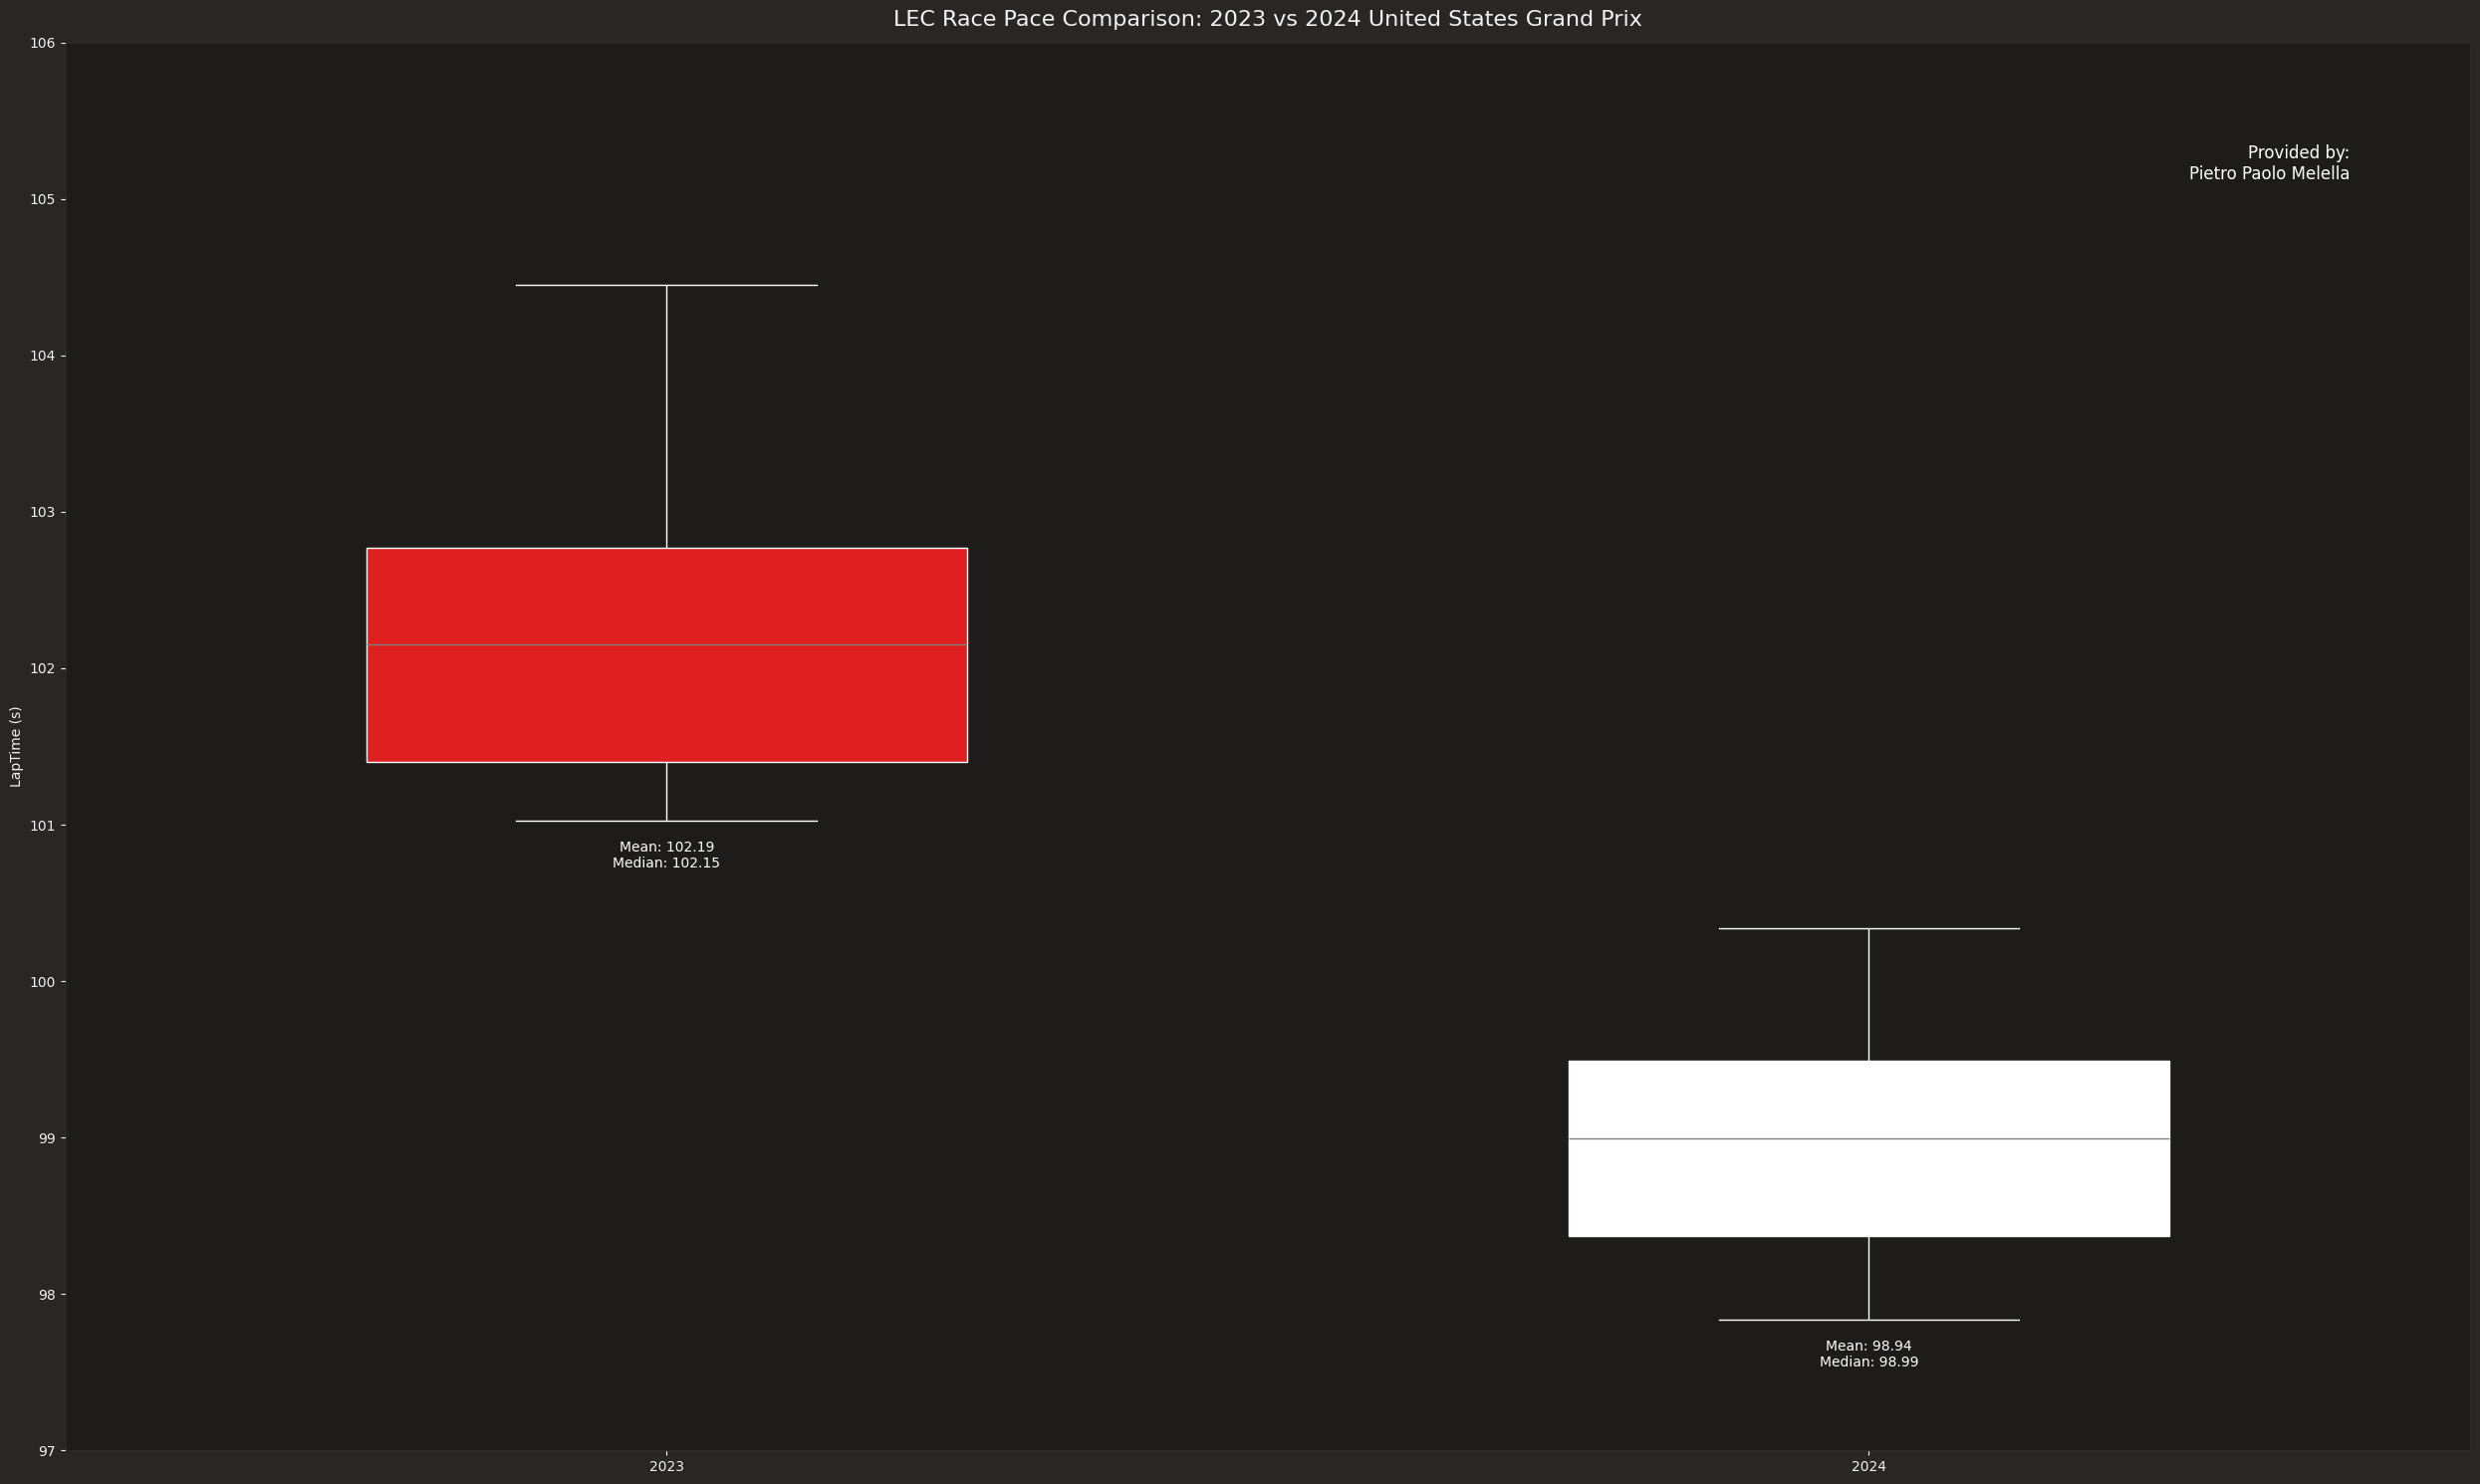

In [68]:
# Define the driver for analysis
driver = 'LEC'

# Filter the laps for LEC in both 2023 and 2024
lec_laps_2023 = transformed_laps_23[transformed_laps_23['Driver'] == driver].copy()
lec_laps_2024 = transformed_laps_24[transformed_laps_24['Driver'] == driver].copy()

lec_laps_2023 = lec_laps_2023.reset_index()
lec_laps_2024 = lec_laps_2024.reset_index()

display

# Add a 'Year' column to distinguish between the two years
lec_laps_2023['Year'] = 2023
lec_laps_2024['Year'] = 2024

# Combine the two DataFrames
combined_lec_laps = pd.concat([lec_laps_2023, lec_laps_2024], ignore_index=True)

# Create driver stats for mean, median, min, and max lap times
drivers_stats = combined_lec_laps.groupby(['Year', 'Driver'])['LapTime (s)'].agg(['mean', 'median', 'min', 'max'])

# Sort drivers by the median lap times for both years
median_lap_times = drivers_stats['median']
sorted_drivers = combined_lec_laps['Year'].unique()

# Initialize the plot
fig, ax = plt.subplots(figsize=(25, 15))  # Increased figure size to accommodate wider boxes

# Use seaborn to create a boxplot for race pace comparison
sns.boxplot(
    data=combined_lec_laps,
    x="Year",  # X-axis for the years (2023 and 2024)
    y="LapTime (s)",  # Y-axis for lap times
    hue="Year",  # Differentiate between years
    palette={2023: "red", 2024: "white"},  # Assign colors for each year
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
    width=0.5,  # Box width
    dodge=False,  # Ensure the boxes are centered under each year
    legend=False  # Disable legend as it's redundant with hue
)

# Loop through the years and add mean and median text under each box
# Loop through the unique years and add mean and median text under each box for LEC
for i, year in enumerate(combined_lec_laps['Year'].unique()):
    # Get the whisker positions (min or max depending on where you want to place the label)
    whisker_position = drivers_stats.loc[(year, driver), 'min']  # Access the 'min' value for LEC

    mean_time = drivers_stats.loc[(year, driver), 'mean']  # Access the mean value for LEC
    median_time = drivers_stats.loc[(year, driver), 'median']  # Access the median value for LEC

    # Place the text slightly below the whisker (min value in this case), adjust y-position
    ax.text(
        i, whisker_position - 0.3,  # Adjust the y position slightly below the whisker
        f'Mean: {mean_time:.2f}\nMedian: {median_time:.2f}',  # Format mean and median values
        horizontalalignment='center', color='white', fontsize=10
    )

# Add a title
plt.title(f"LEC Race Pace Comparison: 2023 vs 2024 {session_24.event['EventName']}", fontsize=16)

# Remove grid for better clarity
plt.grid(visible=False)

# Add a signature in the lower-right corner with a newline
plt.text(
    0.95, 0.9, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='White', fontsize=12
)

# Set y-axis limit based on data range
ax.set_ylim(97, 106)  # Adjust based on your lap time data range
ax.set(xlabel=None)  # Remove x-label as it's redundant

plt.tight_layout()
plt.show()

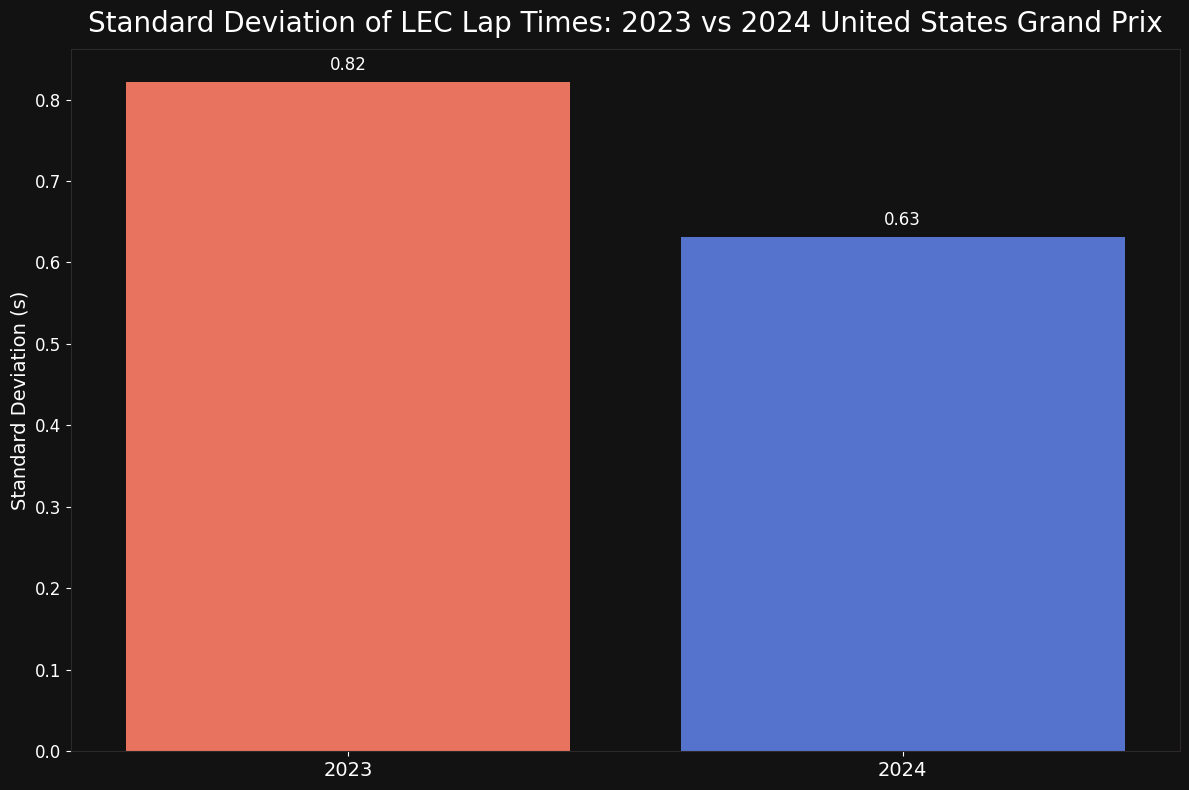

In [73]:
# Calculate standard deviation for lap times in 2023 and 2024
std_dev_2023 = lec_laps_2023['LapTime (s)'].std()
std_dev_2024 = lec_laps_2024['LapTime (s)'].std()

# Create a DataFrame to store the standard deviation results for plotting
std_dev_data = pd.DataFrame({
    'Year': ['2023', '2024'],  # Convert Year to string to match seaborn's expectations
    'Standard Deviation': [std_dev_2023, std_dev_2024]
})

# Initialize the figure and plot the bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Plot a bar plot for standard deviation, assigning Year to hue and removing the legend
sns.barplot(
    data=std_dev_data,
    x='Year',
    y='Standard Deviation',
    hue='Year',  # Assigning x to hue to avoid the future warning
    palette={'2023': "tomato", '2024': "royalblue"},  # Use string keys for the palette
    ax=ax,
    legend=False  # Turn off the legend as it's not needed
)

# Add annotations for the exact standard deviation values above the bars
for i, std_dev in enumerate(std_dev_data['Standard Deviation']):
    ax.text(i, std_dev + 0.01, f'{std_dev:.2f}', ha='center', va='bottom', color='white', fontsize=12)

# Set plot aesthetics (dark background, white text)
ax.set_facecolor('#121212')  # Dark background for the plot area
fig.patch.set_facecolor('#121212')  # Dark background for the figure

# Title and labels
plt.title(f"Standard Deviation of LEC Lap Times: 2023 vs 2024 {session_24.event['EventName']}", fontsize=20, color='white')
ax.set_xlabel(None)  # Remove x-axis label (years are self-explanatory)
ax.set_ylabel('Standard Deviation (s)', fontsize=14, color='white')

# Customize tick labels without directly setting tick labels
ax.tick_params(axis='x', colors='white', labelsize=14)  # Customize x-axis tick label size and color
ax.tick_params(axis='y', colors='white', labelsize=12)  # Customize y-axis tick label size and color

# Remove the grid for a cleaner look
plt.grid(False)

# Adjust the layout for better fit
plt.tight_layout()

# Show the plot
plt.show()